In [61]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D, Bidirectional
from tensorflow.keras.layers import LocallyConnected2D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger,LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [63]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
#from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [64]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()


In [65]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [66]:
# pd.options.display.float_format = '{:.1f}'.format
pd.options.display.float_format = "{:,.5f}".format
sns.set() # Default seaborn look and feel
#plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS=[]
for i in range(1,53,1):
  LABELS.append (i)
print(LABELS)

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [67]:
# The number of steps within one time segment
TIME_PERIODS = 1
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 1
N_FEATURES = 10

In [68]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'Class_label']


In [69]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [70]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [71]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [72]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [73]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [74]:
file_train_path='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/sub_wise_process_TT/S8_tr.csv'
file_test_path='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/sub_wise_process_TT/S8_tt.csv'

In [75]:
df_Train = read_data_Train(file_train_path)

In [76]:
df_Test = read_data_Test(file_test_path)

In [77]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
# print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
# print('df_test_size',df_Test)

In [78]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [79]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print('num_time_periods',num_time_periods)
print('num_sensors',num_sensors)
num_classes = le.classes_.size
print('class_list',list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (181999, 1, 10)
181999 training samples
y_train shape:  (181999,)
num_time_periods 1
num_sensors 10
class_list [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (1, 10)
input_shape: (1, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (181999, 52)


In [80]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (77999, 1, 10)
77999 testing samples
y_test shape:  (77999,)


In [81]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 1, 10
n_depth=1
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (181999, 1, 10, 1)
x_test shape:  (77999, 1, 10, 1)
n_outputs 52


In [82]:
verbose, epochs, batch_size = 0, 100, 1000

In [85]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_initializer="glorot_normal",strides=(1,1), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="same",kernel_initializer="glorot_normal",strides=(1,1)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(LocallyConnected2D(64, kernel_size=(1, 1),kernel_initializer="glorot_normal",strides=(1,1),padding='valid'))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(LocallyConnected2D(64, kernel_size=(1, 1),kernel_initializer="glorot_normal",strides=(1,1),padding='valid'))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, kernel_initializer="glorot_normal"))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512, kernel_initializer="glorot_normal"))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer="glorot_normal"))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('relu'))
# model.add(Dense(512, activation='tanh'))
model.add(Dense(n_outputs, activation='softmax'))

In [86]:
def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.1
   epochs_drop = 16.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [87]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [88]:
# adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
sgd=optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 1, 10, 64)         640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 1, 10, 64)         256       
_________________________________________________________________
activation_6 (Activation)    (None, 1, 10, 64)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 10, 64)         36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 1, 10, 64)         256       
_________________________________________________________________
activation_7 (Activation)    (None, 1, 10, 64)         0         
_________________________________________________________________
locally_connected2d (Locally (None, 1, 10, 64)        

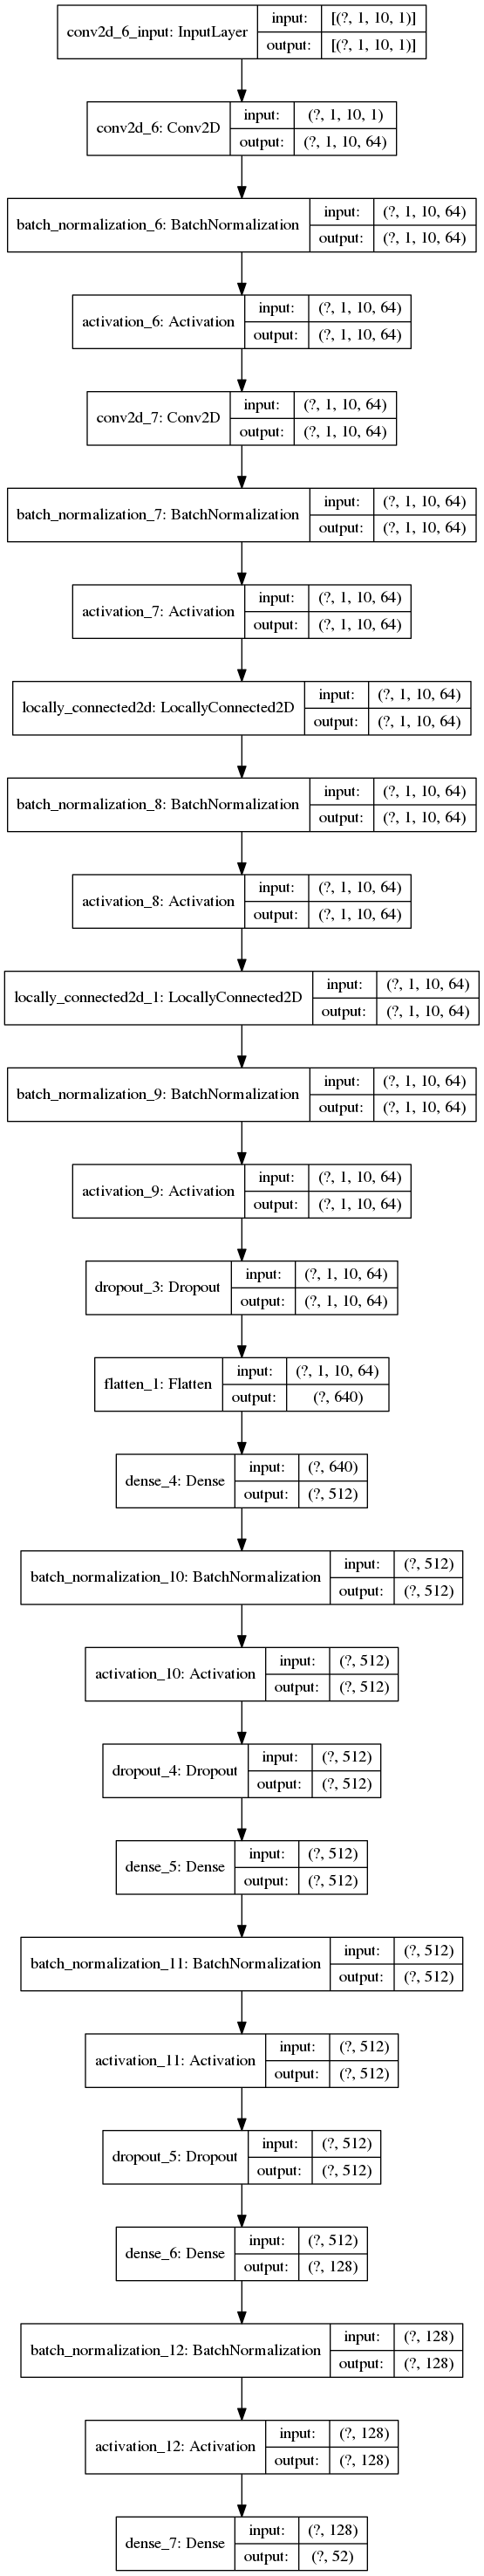

In [89]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [90]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/100
181/182 [============================>.] - ETA: 0s - loss: 2.7035 - accuracy: 0.2720
Epoch 00001: val_accuracy improved from -inf to 0.48266, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
182/182 [==============================] - 3s 17ms/step - loss: 2.6994 - accuracy: 0.2728 - val_loss: 1.8492 - val_accuracy: 0.4827 - lr: 0.1000
Epoch 2/100
181/182 [============================>.] - ETA: 0s - loss: 1.7015 - accuracy: 0.4926
Epoch 00002: val_accuracy improved from 0.48266 to 0.54152, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
182/182 [==============================] - 3s 16ms/step - loss: 1.7003 - accuracy: 0.4929 - val_loss: 1.5897 - val_accuracy: 0.5415 - lr: 0.1000
Epoch 3/100
178/182 [============================>.] - ETA: 0s - loss: 1.4233 - accuracy: 0.5633
Epoch 00003: val_accuracy improved from 0.54152 to 0.56703, saving model to /media/nav

Epoch 26/100
181/182 [============================>.] - ETA: 0s - loss: 0.4720 - accuracy: 0.8397
Epoch 00026: val_accuracy did not improve from 0.63220
182/182 [==============================] - 3s 15ms/step - loss: 0.4720 - accuracy: 0.8397 - val_loss: 1.7281 - val_accuracy: 0.6226 - lr: 0.0100
Epoch 27/100
180/182 [============================>.] - ETA: 0s - loss: 0.4659 - accuracy: 0.8403
Epoch 00027: val_accuracy did not improve from 0.63220
182/182 [==============================] - 3s 15ms/step - loss: 0.4654 - accuracy: 0.8404 - val_loss: 2.1304 - val_accuracy: 0.5734 - lr: 0.0100
Epoch 28/100
179/182 [============================>.] - ETA: 0s - loss: 0.4605 - accuracy: 0.8420
Epoch 00028: val_accuracy did not improve from 0.63220
182/182 [==============================] - 3s 15ms/step - loss: 0.4603 - accuracy: 0.8422 - val_loss: 1.7690 - val_accuracy: 0.6170 - lr: 0.0100
Epoch 29/100
178/182 [============================>.] - ETA: 0s - loss: 0.4587 - accuracy: 0.8431
Epoch 00

Epoch 52/100
182/182 [==============================] - ETA: 0s - loss: 0.4245 - accuracy: 0.8539
Epoch 00052: val_accuracy did not improve from 0.63571
182/182 [==============================] - 3s 14ms/step - loss: 0.4245 - accuracy: 0.8539 - val_loss: 1.7281 - val_accuracy: 0.6355 - lr: 1.0000e-04
Epoch 53/100
178/182 [============================>.] - ETA: 0s - loss: 0.4257 - accuracy: 0.8543
Epoch 00053: val_accuracy did not improve from 0.63571
182/182 [==============================] - 3s 14ms/step - loss: 0.4256 - accuracy: 0.8543 - val_loss: 1.7283 - val_accuracy: 0.6343 - lr: 1.0000e-04
Epoch 54/100
179/182 [============================>.] - ETA: 0s - loss: 0.4233 - accuracy: 0.8550
Epoch 00054: val_accuracy did not improve from 0.63571
182/182 [==============================] - 3s 15ms/step - loss: 0.4229 - accuracy: 0.8552 - val_loss: 1.7270 - val_accuracy: 0.6341 - lr: 1.0000e-04
Epoch 55/100
181/182 [============================>.] - ETA: 0s - loss: 0.4231 - accuracy: 0.8

178/182 [============================>.] - ETA: 0s - loss: 0.4242 - accuracy: 0.8545
Epoch 00079: val_accuracy did not improve from 0.63571
182/182 [==============================] - 3s 15ms/step - loss: 0.4238 - accuracy: 0.8547 - val_loss: 1.7248 - val_accuracy: 0.6345 - lr: 1.0000e-05
Epoch 80/100
182/182 [==============================] - ETA: 0s - loss: 0.4251 - accuracy: 0.8536
Epoch 00080: val_accuracy did not improve from 0.63571
182/182 [==============================] - 3s 14ms/step - loss: 0.4251 - accuracy: 0.8536 - val_loss: 1.7286 - val_accuracy: 0.6356 - lr: 1.0000e-06
Epoch 81/100
179/182 [============================>.] - ETA: 0s - loss: 0.4227 - accuracy: 0.8561
Epoch 00081: val_accuracy did not improve from 0.63571
182/182 [==============================] - 2s 14ms/step - loss: 0.4222 - accuracy: 0.8563 - val_loss: 1.7264 - val_accuracy: 0.6348 - lr: 1.0000e-06
Epoch 82/100
178/182 [============================>.] - ETA: 0s - loss: 0.4238 - accuracy: 0.8539
Epoch 000

In [91]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index])

epoch_number 88
train accuracy and validation accuracy 0.8550596237182617 0.6360979080200195


In [92]:
model.save('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/CNN_LSTM_nina_5X97')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/CNN_LSTM_nina_5X97/assets


In [93]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

78/78 [==============================] - 1s 8ms/step - loss: 1.7302 - accuracy: 0.6361
test_accuracy 0.6360979080200195


In [94]:
test_acc=[]
test_acc.append(testaccuracy)

In [95]:
print(test_acc)

[0.6360979080200195]
